### Гибель Титаника является одним из самых печально известных кораблекрушений в истории. 15 апреля 1912 года во время своего первого плавания, Титаник затонул после столкновения с айсбергом, при этом погибло 1502 из 2224 пассажиров и членов экипажа.

### Некоторые группы людей имели больше шансов выжить, по сравнению с другими. Например, женщины, дети, пассажиры высшего класса.

### Набор данных, для изучения, содержит информацию, полученную от 891 из 2224 пассажиров и членов экипажа на борту "Титаника".

#### Описание dataset Titanic_data_analysis:

#### Включает в себя файл titanic-data.csv
#### Каждая строчка наборов данных содержит следующие поля:

   - Survived — выжил данный пассажир или нет (0 для умерших, 1 для выживших);

   - Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший), показатель социально-экономического статуса (SES);

   - Name — имя;

   - Sex — пол;

   - Age — возраст (дробный, если меньше 1. Если возраст оценивается, он в форме xx.5);

   - SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

   - Parch — количество родителей, детей (в том числе приемных) на борту титаника;

   - Ticket — номер билета;

   - Fare — плата за проезд;

   - Cabin — каюта;

   - Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).


## 1. Определение проблемы.

   
### Задание:
   
   
### Провести анализ, найти закономерности и сделать вывод.
  

### Иследование выявит взаимосвязь между выживаемостью (Survived) на Titanic и различными факторами (класс каюты, возраст, пол, порт посадки и т. д.).

## 2. Извлечение данных.

In [67]:
import pandas as pd                            # Импорт модулей для анализа данных
import numpy as np
     
import matplotlib.pyplot as plt                # Импорт модулей для рисования
import seaborn as sns
%matplotlib inline
     
data_t = pd.read_csv('titanic-data.csv')       # Извлечь и рочитать первые десять строк данных
data_t.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 3. Подготовка данных

#### Наблюдение за данными.

In [68]:
data_t.info()                                 # Информация о наборе данных, включая размер набора данных, имя столбца, тип
data_t.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Благодаря предварительному наблюдению за данными, эта выборка данных содержит в общей сложности 891 строку * 12 столбцов данных.  
Наблюдения показали, что Age, Cabin и Embarked содержат нулевые значения.

#### Повторяющиеся данные.

In [69]:
data_t.duplicated().value_counts()                    # Отображение количества повторяющихся данных

False    891
dtype: int64

В наборе данных содержится 891 строка данных, которые не повторяются.

#### Нулевые значения.

In [70]:
print(data_t['Age'].isnull().value_counts())
print('-'*50)
print(data_t['Cabin'].isnull().value_counts())         # Показать столбцы с нулевыми значениями
print('-'*50)
print(data_t['Embarked'].isnull().value_counts())
print('-'*50)

False    714
True     177
Name: Age, dtype: int64
--------------------------------------------------
True     687
False    204
Name: Cabin, dtype: int64
--------------------------------------------------
False    889
True       2
Name: Embarked, dtype: int64
--------------------------------------------------


- Возраст имеет 714 строк пустых данных.

- В каюте 204 строки пустых данных.

- Посадка (станция посадки) имеет 2 строки пустых данных.

#### Описательная статистика.

In [71]:
data_t.describe()                                   # Описательный анализ

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Из 891 пассажира, совершившего эту поездку, 38% выжили, повезло.
- Среди всех пассажиров самому младшему всего 0,4 года, самому старшему - 80 лет, а средний возраст - около 28 лет.
- В среднем каждого пассажира сопровождают 0,52 брата и сестры и 0,38 родителей и супругов.
- У некоторых пассажиров на самом деле путешествуют 8 человек.
- Пассажиры потратили на эту поездку в среднем 32 доллара США, максимум 512 долларов США (благородный)

#### Очистка данных.

In [72]:
data_t['Age'] = data_t['Age'].fillna(data_t['Age'].mean()).astype(np.int64)        # Обработка нулевых значений
data_t['Embarked'] = data_t['Embarked'].fillna({"Embarked":"S"},inplace=True)

data_t = data_t.drop(['Ticket','Cabin'],axis='columns')                            # Удалить нерелевантные столбцы
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     0 non-null      object 
dtypes: float64(1), int64(6), object(3)
memory usage: 69.7+ KB


#### Обработка пустых и избыточных значений.

- Замена нулевого значения используется среднее количество возрастов. 

- Поскольку буква «S» встречается чаще всего, а позиция кофе является самой высокой, замена нулевое значение на «S».

- Удалены два столбца «Билет» и «Каюта». Фактически, эти два столбца данных не очень полезны для нашего анализа данных.

### 4. Исследование и визуализация данных.

#### Базовый ситуационный анализ.

Основная ситуация: каков процент выживающих и процент не выживающих среди 891 человека?

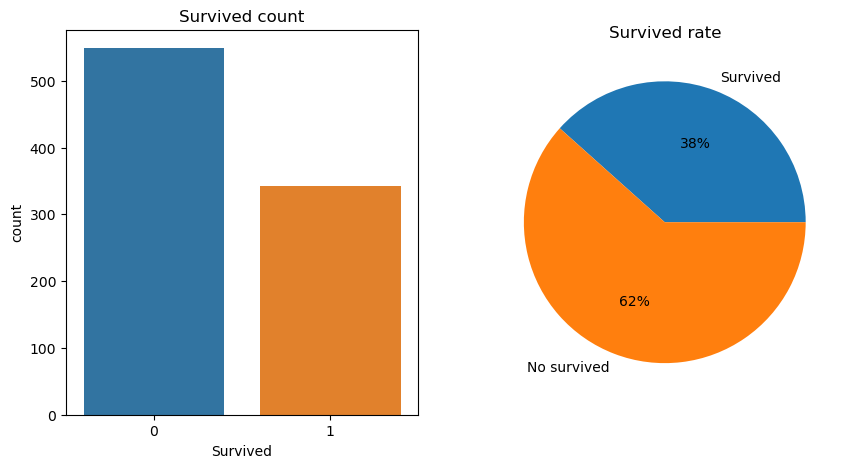

In [73]:
total_survived = data_t['Survived'].sum()
total_no_survived = 891 - total_survived
     
plt.figure (figsize = (10,5))                               # создать холст
plt.subplot (121)                                           # Добавить первый подзаголовок
sns.countplot(x='Survived',data=data_t)
plt.title('Survived count')
     
plt.subplot (122)                                           # Добавить второй подзаголовок
plt.pie([total_survived,total_no_survived],labels=['Survived','No survived'],autopct='%1.0f%%')
plt.title('Survived rate')
     
plt.show()

#### Вывод: 
Среди 891 пассажира процент выживших составил 38% и не выживающих составил 62%.

#### Исселдуем взаимосвязь между Pclass, полом, возрастом и «выживанием».

#### Распределение количества людей в разных каютах.

In [74]:
data_t.pivot_table(values='Name',index='Pclass',aggfunc='count')        # Распределение людей по разным каютам

,Name
Pclass,
1,216
2,184
3,491


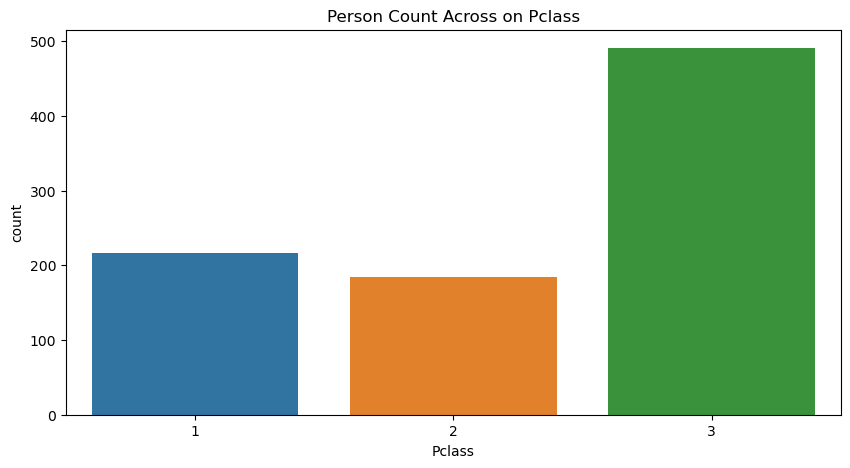

In [75]:
plt.figure (figsize = (10,5))                                            # создать холст
sns.countplot(x='Pclass',data=data_t)
plt.title('Person Count Across on Pclass')
     
plt.show()

#### Взаимосвязь между Pclass — класс пассажира и выживаемостью.

In [76]:
data_t.pivot_table(values='Survived',index='Pclass',aggfunc=np.mean)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


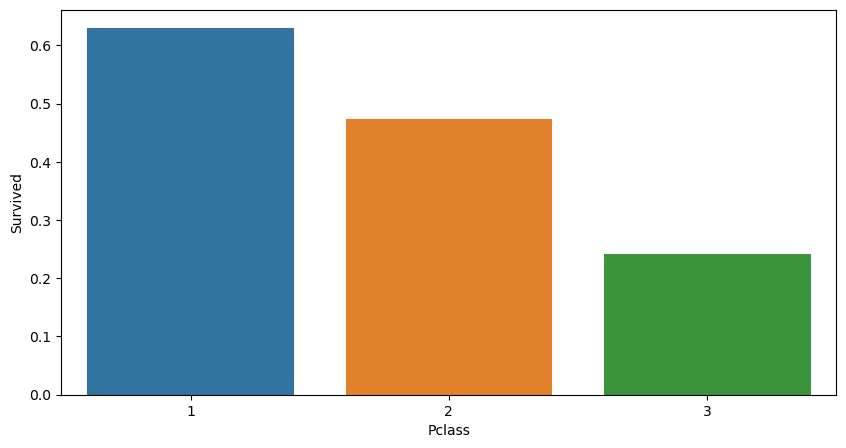

In [77]:
plt.figure(figsize= (10 ,5))
sns.barplot (data = data_t, x = "Pclass", y = "Survived", ci = None)     # ci означает доверительный интервал

plt.show()

#### Вывод:

1) У первого класса самая высокая вероятность выживания,  
2) за ним следует второй класс,  
3) у третьего класса самая низкая вероятность.

#### Связь между полом и выживаемостью.

In [78]:
data_t.pivot_table(values='Survived',index='Sex',aggfunc=np.mean)        # Выживаемость по полу

,Survived
Sex,
female,0.742038
male,0.188908


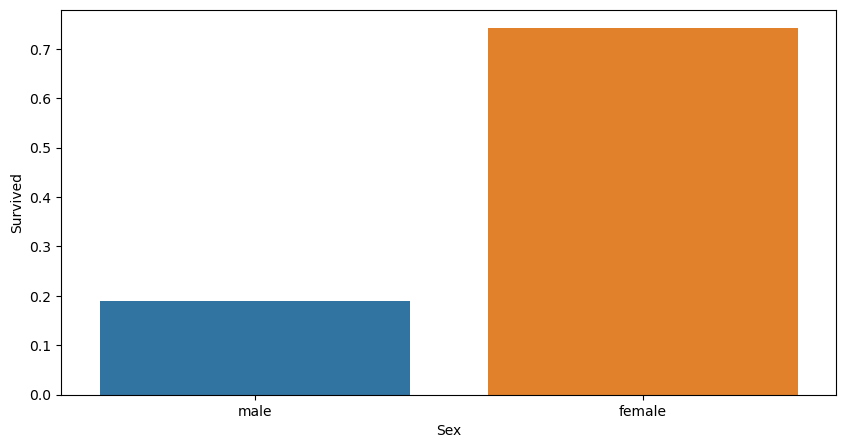

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(data=data_t,x='Sex',y='Survived',ci=None) 
     
plt.show()

#### Вывод:  
вероятность выживания у женщин (74,2%) намного выше, чем у мужчин (18,89%).

#### Рассмотрим взаимосвязь между полом (Sex), классом (Pclass) и выживаемостью.

In [80]:
# Сначала посчитатаем вероятность выживания людей разных классов и полов
data_t.pivot_table(values='Survived',index=['Pclass','Sex'],aggfunc=np.mean)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

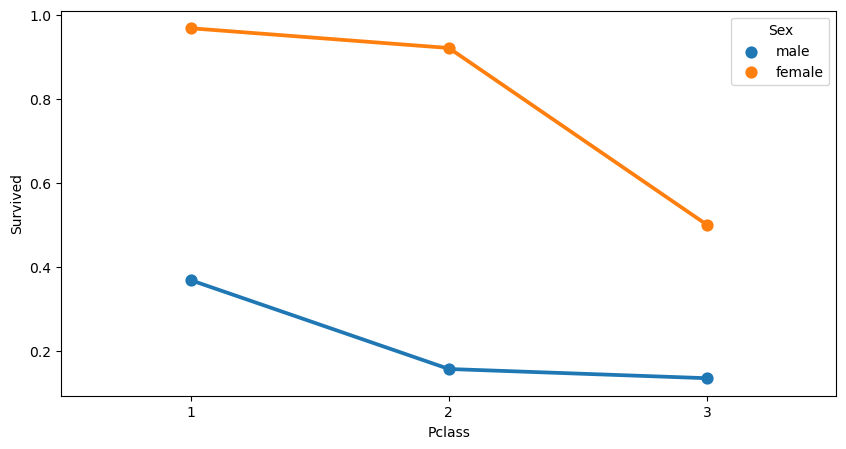

In [81]:
plt.figure(figsize=(10,5))
sns.pointplot(data=data_t,x='Pclass',y='Survived',hue='Sex',ci=None)
 
plt.show()

#### Вывод:

- В каждой каюте выживаемость женщин выше, чем у мужчин.
- Выживаемость женщин в каютах первого и второго класса близка к таковой в каютах третьего класса.
- Выживаемость мужчин в каютах первого класса выше, чем в каютах второго и третьего классов, а выживаемость мужчин в каютах       второго и третьего классов аналогична.


#### Связь между возрастом и выживаемостью.

Разделить значения наблюдений, принадлежащих к единому диапазону, на группу .

In [82]:
data_t ['AgeGroup'] = pd.cut (data_t ['Age'], 5) # Разделите значение столбца age на пять равных частей
data_t.AgeGroup.value_counts(sort=False)

(-0.08, 16.0]    100
(16.0, 32.0]     525
(32.0, 48.0]     186
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: AgeGroup, dtype: int64

#### Выживаемость по возрасту.

In [83]:
data_t.pivot_table(values='Survived',index='AgeGroup',aggfunc=np.mean)   # Выживаемость по возрасту


,Survived
AgeGroup,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.344762
"(32.0, 48.0]",0.403226
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


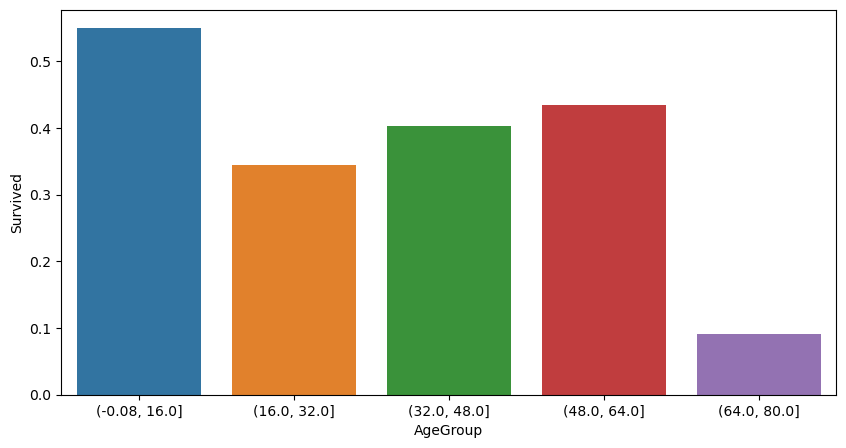

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(data=data_t,x='AgeGroup',y='Survived',ci=None)
 
plt.show()

#### Вывод:
- выживаемость детей и подростков выше.

### Многофакторный анализ.

#### Связь между возрастом (возрастом), полом (полом) и выживаемостью.

In [85]:
data_t.pivot_table(values='Survived',index='AgeGroup',columns='Sex',aggfunc=np.mean)

Sex,female,male
AgeGroup,,
"(-0.08, 16.0]",0.673469,0.431373
"(16.0, 32.0]",0.718391,0.159544
"(32.0, 48.0]",0.791045,0.184874
"(48.0, 64.0]",0.916667,0.177778
"(64.0, 80.0]",NaN,0.090909


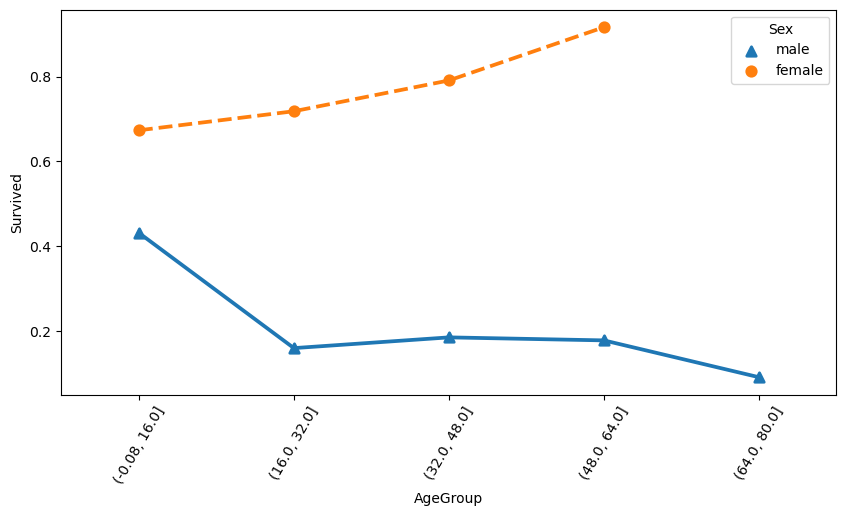

In [86]:
plt.figure(figsize= (10 ,5))
sns.pointplot(data=data_t,x="AgeGroup",y="Survived",hue="Sex",ci=None,
             markers=["^", "o"], linestyles=["-", "--"])
plt.xticks(rotation=60)
 
plt.show()

#### Вывод:
- Дети и подростки, женщины имеют более высокую выживаемость. Большинство оставшихся в живых мужчин - дети.

#### Связь между возрастом (Age), полом (Пол), классом (Pclass) и выживаемостью.

In [87]:
data_t.pivot_table(values="Survived",index="AgeGroup",columns=["Sex","Pclass"],aggfunc=np.mean)


Sex              female                          male                    
Pclass                1         2         3         1         2         3
AgeGroup                                                                 
(-0.08, 16.0]  0.833333  1.000000  0.545455  1.000000  0.818182  0.270270
(16.0, 32.0]   0.975610  0.923077  0.521277  0.354167  0.086207  0.138776
(32.0, 48.0]   1.000000  0.904762  0.250000  0.435897  0.076923  0.055556
(48.0, 64.0]   0.941176  0.833333  1.000000  0.269231  0.090909  0.000000
(64.0, 80.0]        NaN       NaN       NaN  0.166667  0.000000  0.000000

C:\Users\BETEPOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


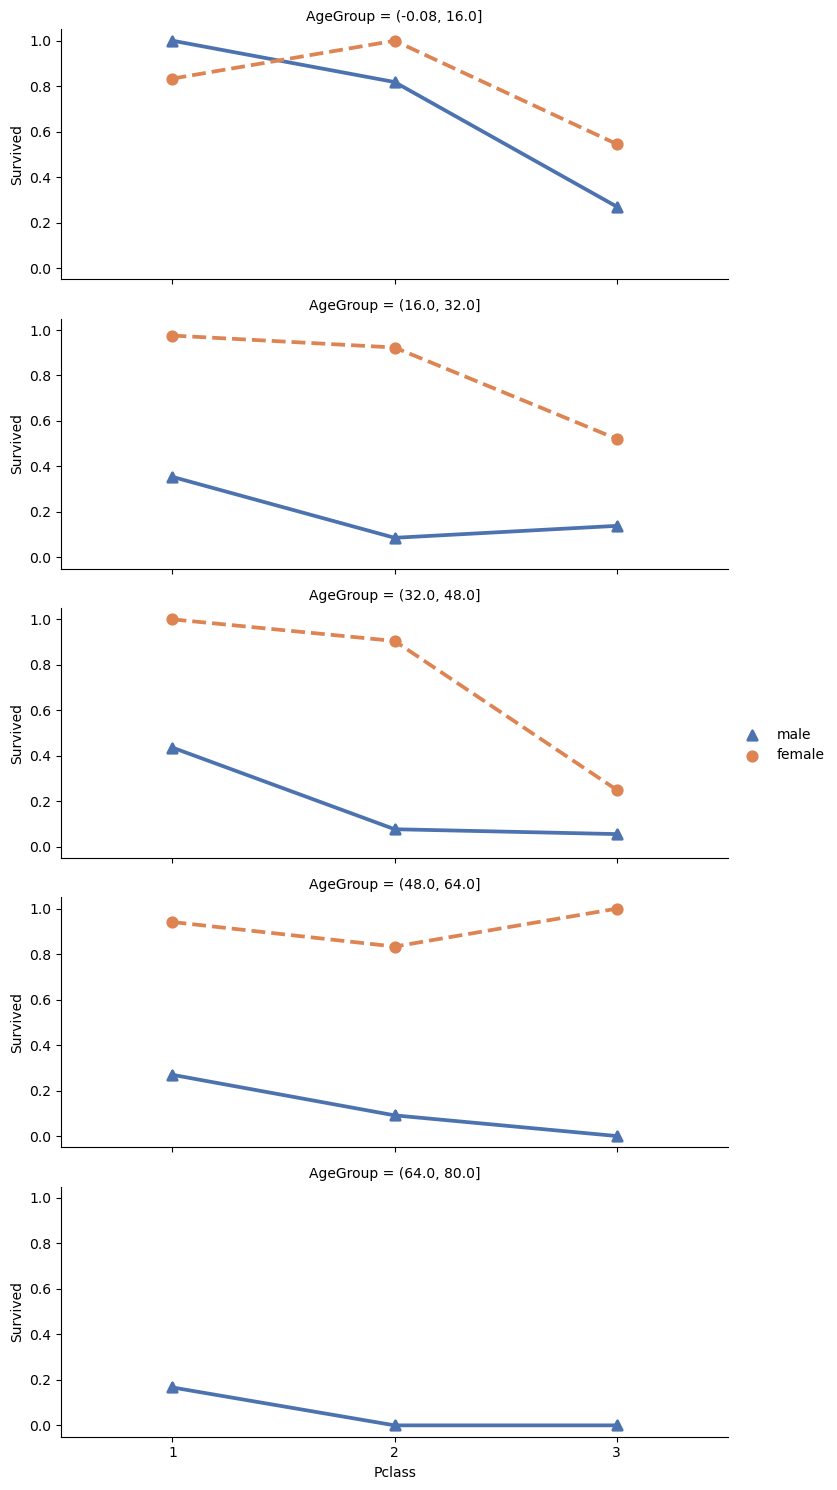

In [88]:
sns.FacetGrid(data=data_t,row="AgeGroup",aspect=2.5)\
.map(sns.pointplot,"Pclass","Survived","Sex",hue_order=["male","female"],ci=None,palette="deep", 
     markers=["^", "o"], linestyles=["-", "--"]).add_legend()
 
plt.show()

#### Итоговый вывод:

- Этот анализ в основном исследует взаимосвязь между выживаемостью на Титанике и различными факторами (класс кабины, возраст, пол, порт посадки и т. д.).

- Размер выборки - 891. После кораблекрушения выжило 342 человека, выживаемость - 38%.

- На Титанике есть три типа кают: один, два и третий класс, среди которых первый класс имеет самую высокую вероятность выживания, за ним следует второй класс, а третий класс имеет самую низкую вероятность.

- Среди 891 человека 577 мужчин и 314 женщин. Выживаемость женщин намного выше, чем у мужчин. Видно, что женщины с большей вероятностью выживут в этой аварии, чем мужчины, что указывает на то, что в этой аварии был применен принцип «дамы прежде всего».

- Среди 891 человека в выборке минимальный Возраст составляет 0,42 года, а максимальный - 80 лет. Согласно принципу деления, он делится на 5 групп. Выживаемость детей и подростков самая высокая.

- Среди 891 человека в выборке выживаемость из порта C — Шербур была самой высокой, за ней следовало  из порта Q — Квинстаун, а из порта S — Саутгемптон была самая низкая выживаемость.

### 5) Заключение.

#### Из приведенного выше анализа данных мы можем сделать следующий вывод:

- Женщинам уделялось больше внимания, чем мужчинам, спасательными материалами, такими как спасательные шлюпки, потому что гендерное исследование показало, что выживаемость женщин составила 74,2%%, что намного выше, чем у мужчин.

- Женщины из высшего и среднего классов получили наивысший приоритет, потому что исследование Pclass показывает, что выживаемость женщин из высшего и среднего классов составляла более 93%.

- При исследовании данных о возрасте мы выяснили, что если семья не получала шанса выжить, то погибала вся семья, включая детей, и если в случае, если семья получала шанс выжить, то приоритет отдавался женщинам и детям.

### Благодарю за внимание!


## Выполнил Андрей Кошелев Аналитика | 6 | 3040 | 21.09.2022